In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics


cols = [x + 1 for x in range(60)] + ["class"]
df = pd.read_csv("sonar.csv", names=cols)
df["class"] = df["class"].astype('category').cat.codes

display(df)


,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


Add column numbers plus class

SVM classifier instantiate code

In [3]:
class SVM_classifier():
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        self.m, self.n = X.shape 

        self.w = np.zeros(self.n)
        self.b = 0 
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        y_label = np.where(self.Y <= 0, -1, 1)

        for index, x_i in enumerate(self.X):

            condition = y_label[index] * (np.dot(x_i, self.w)-self.b) >= 1

            if (condition == True):


                dw = 2 * self.lambda_parameter * self.w 
                db = 0 

            else:

                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]

                self.w = self.w - self.learning_rate * dw
                self.b = self.b - self.learning_rate * db

                


    def predict (self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1,0,1)
        return y_hat


dropping the only focus variable 

In [4]:
features = df.drop(columns = 'class', axis = 1)
target = df['class']

Standardisation of data 

In [5]:

scalar = StandardScaler()
scalar.fit(features)
StandardScaler(copy = True, with_mean=True, with_std=True)
standardized_data = scalar.transform(features)
print(standardized_data)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]


In [6]:
features = standardized_data
target = df['class']

In [7]:
print(features)
print(target)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]
0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: class, Length: 208, dtype: int8


In [8]:
#train test 
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)

In [9]:
print(features.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [10]:
classifier = SVM_classifier(learning_rate=0.001,no_of_iterations=1000,lambda_parameter=0.01)

In [11]:
classifier.fit(X_train, Y_train)

Accuracy score testing 

In [12]:
from sklearn.metrics import accuracy_score


X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction )
print("Accuracy for train: ", training_data_accuracy)

Accuracy for train:  0.9457831325301205


In [13]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy for test:", test_data_accuracy)

Accuracy for test: 0.8333333333333334


In [14]:
from sklearn.metrics import classification_report, confusion_matrix


support_vector_classifier = SVC(kernel = "linear").fit(X_train, Y_train)
#support_vector_classifier
support_vector_classifier.C
y_pred = support_vector_classifier.predict(X_test)

ab = confusion_matrix(Y_test, y_pred)
#ab
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.89      0.77      0.83        22

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



In [15]:
from sklearn.model_selection import cross_val_score


accuracy = cross_val_score(estimator=support_vector_classifier, X=X_test, y=Y_test, cv=10)

print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("SD : {:.2f} %".format(accuracy.std()*100))


Accuracy: 81.00 %
SD : 14.80 %


Area under classifier 

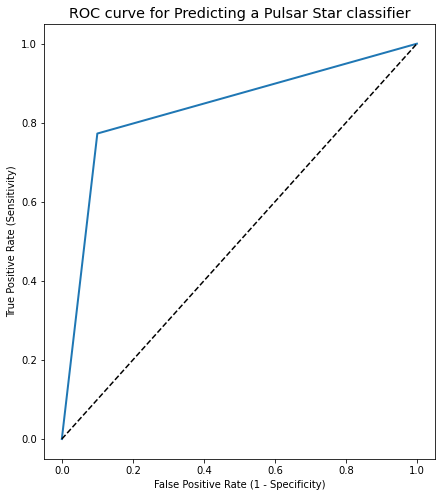

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

plt.figure(figsize=(7,8))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [17]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8364


Confusion metrix (heatmap plot)

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,y_pred)

#confusion metrics 

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[18  2]
 [ 5 17]]

True Positives(TP) =  18

True Negatives(TN) =  17

False Positives(FP) =  2

False Negatives(FN) =  5


<AxesSubplot:>

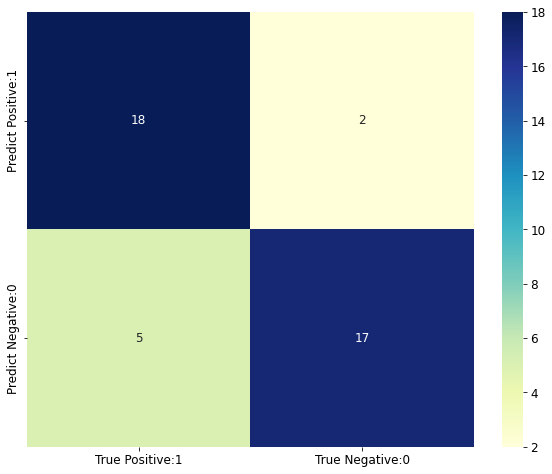

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 8))

cm_matrix = pd.DataFrame(data=cm, columns=['True Positive:1', 'True Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


(practise and work around)

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm 
X, Y = make_classification(n_samples=100, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
clf = svm.SVC(kernel="precomputed",)

gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, Y_train)

gram_train = np.dot(X_train, X_train.T)
clf.predict(gram_train)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0])

In [21]:
# import matplotlib.pyplot as plt
# from sklearn import svm
# from sklearn.datasets import make_blobs
# from sklearn.inspection import DecisionBoundaryDisplay

# X, Y = make_blobs(n_samples=40, centers =2, random_state=6)

# clf = svm.SVC(kernel = "linear", C=1000)
# clf.fit(X,Y)

# plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

# ax = plt.gca()
# DecisionBoundaryDisplay.from_estimator(
#     clf,
#     X,
#     plot_method="contour",
#     colours='k',
#     levels=[-1,0,1],
#     alpha=0.5,
#     linestyles=["--", "-", "--"],
#     ax=ax,
# )

# ax.scatter(
#     clf.support_vectors_[:, 0],
#     clf.support_vectors_[:, 1],
#     s=100,
#     linewidth=1,
#     facecolors="none",
#     edgecolors="k",
# )

# plt.show()

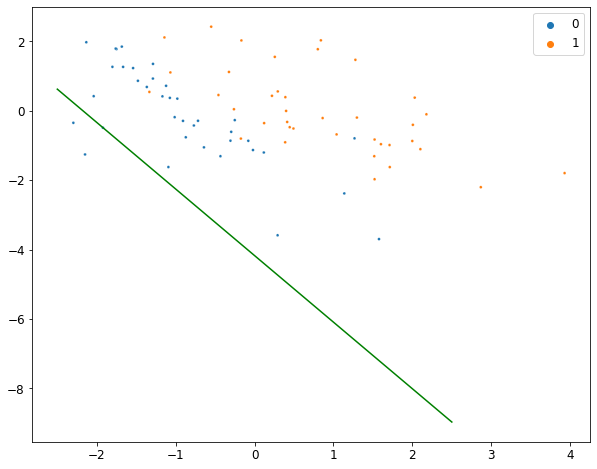

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train, Y_train)

plt.figure(figsize=(10, 8))

sns.scatterplot(x=X_train[:, 10], 
                y=X_train[:, 17], 
                hue=Y_train, 
                s=8)

w = svc_model.coef_[0]      
a =  -w[0] / w[1]
b = svc_model.intercept_[0]      
x_points = np.linspace(-2.5, 2.5)    
y_points = a * x_points - b / w[1]  

plt.plot(x_points, y_points, c='g')

scatterplot 

<function matplotlib.pyplot.show(close=None, block=None)>

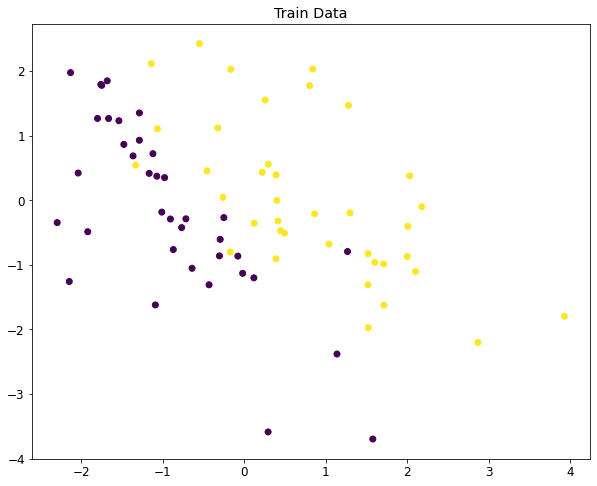

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 10 ], X_train[:,17], c=Y_train)

#plot data 
plt.title("Train Data")
plt.show
